In [469]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [470]:
# Load the Dataset
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
# Explore the Dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [471]:
# finding Duplicates
df.duplicated().sum()

763

In [472]:
#Dropping Duplicates
df=df.drop_duplicates()
df.duplicated().sum()

0

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [474]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


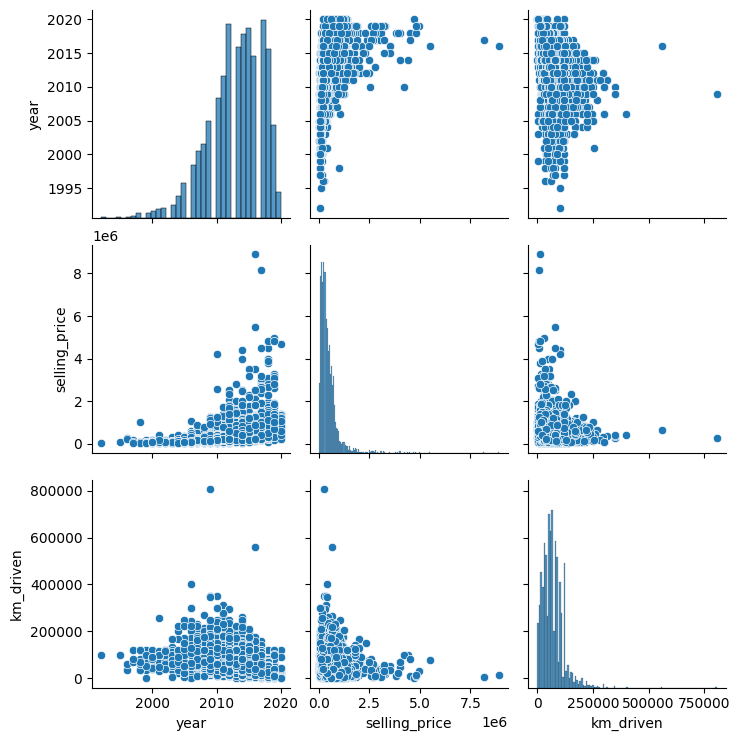

In [475]:
# Visualize the data
sns.pairplot(df)
plt.show()

In [477]:
# Create new features
df['age'] = 2024 - df['year']
df['price_per_km'] = df['selling_price'] / df['km_driven']

# Drop the 'year' column as it's now encoded in the 'age' feature
df = df.drop('year', axis=1)




In [479]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3577 non-null   int32  
 1   selling_price  3577 non-null   int64  
 2   km_driven      3577 non-null   int64  
 3   fuel           3577 non-null   int32  
 4   seller_type    3577 non-null   int32  
 5   transmission   3577 non-null   int32  
 6   owner          3577 non-null   int32  
 7   age            3577 non-null   int64  
 8   price_per_km   3577 non-null   float64
dtypes: float64(1), int32(5), int64(3)
memory usage: 209.6 KB


In [481]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age,price_per_km
0,775,60000,70000,4,1,1,0,17,0.857143
1,1041,135000,50000,4,1,1,0,17,2.700000
2,505,600000,100000,1,1,1,0,12,6.000000
3,118,250000,46000,4,1,1,0,7,5.434783
4,279,450000,141000,1,1,1,2,10,3.191489


In [482]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [483]:
# Split the data into training and testing sets
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [484]:

# Train the models
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [485]:
# Hyperparameter tuning for Random Forest Regression
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_absolute_error', verbose=1)
rf_grid.fit(X_train, y_train)

print('Best Random Forest Regression Hyperparameters:', rf_grid.best_params_)
rf = rf_grid.best_estimator_

# Hyperparameter tuning for Gradient Boosting Regression
gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_absolute_error', verbose=1)
gb_grid.fit(X_train, y_train)

print('Best Gradient Boosting Regression Hyperparameters:', gb_grid.best_params_)
gb = gb_grid.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Regression Hyperparameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Gradient Boosting Regression Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [488]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the models on the test set
print('Linear Regression:')
y_pred_lr = lr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print('Random Forest Regression:')
y_pred_rf = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print('Gradient Boosting Regression:')
y_pred_gb = gb.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))

Linear Regression:
MAE: 214926.95973234903
RMSE: 445293.41003466636
Random Forest Regression:
MAE: 65484.833080139295
RMSE: 239800.1442066668
Gradient Boosting Regression:
MAE: 35701.142844885704
RMSE: 211733.9451083935
